# **Fundamentos de Data Science**
# **Exámen de Certificación: Intento 2**

## **Analizando la Satisfacción de Clientes en la Industria Hotelera**
### **Requisitos:**

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado [aquí](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

### **1. Limpieza de datos con Python:**
- Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
- Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
- Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
- Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

### **2. Exploración de datos con Python:**
- Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### **3. Análisis adicional:**
- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.



In [18]:
import pandas as pd

# CARGAR EL DATASET

hotel_data_path = r'C:\Users\Andy\Documents\Examen\Data\hotel_bookings.csv'
hotel_df = pd.read_csv(hotel_data_path)

# Información básica del dataset
info_basica = hotel_df.info()

# Número de filas y columnas
num_filas, num_columnas = hotel_df.shape

# Mostrar nombres de las columnas
nombres_columnas = hotel_df.columns

# Contar los valores faltantes por columna
valores_faltantes = hotel_df.isnull().sum()

# Calcular la proporción de valores faltantes en cada columna
proporcion_faltantes = (hotel_df.isnull().mean() * 100)

# Mostrar toda la información relevante
info = pd.DataFrame({
    "Valores faltantes": valores_faltantes,
    "Proporción de valores faltantes (%)": proporcion_faltantes
})

# Mostrar el DataFrame de la información
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,Valores faltantes,Proporción de valores faltantes (%)
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [19]:
# Definir el diccionario de tipos de datos para cada columna
diccionario_tipos = {
    'hotel': 'string',                           
    'is_canceled': 'int',                        
    'lead_time': 'int',                          
    'arrival_date_year': 'int',                  
    'arrival_date_month': 'string',              
    'arrival_date_week_number': 'int',           
    'arrival_date_day_of_month': 'int',          
    'stays_in_weekend_nights': 'int',            
    'stays_in_week_nights': 'int',               
    'adults': 'int',                             
    'children': 'int',                          
    'babies': 'int',                             
    'meal': 'string',                            
    'country': 'string',                         
    'market_segment': 'string',                  
    'distribution_channel': 'string',            
    'is_repeated_guest': 'int',                  
    'previous_cancellations': 'int',             
    'previous_bookings_not_canceled': 'int',     
    'reserved_room_type': 'string',              
    'assigned_room_type': 'string',              
    'booking_changes': 'int',                    
    'deposit_type': 'string',                    
    'agent': 'float',                            
    'company': 'float',                          
    'days_in_waiting_list': 'int',               
    'customer_type': 'string',                   
    'adr': 'float',                              
    'required_car_parking_spaces': 'int',        
    'total_of_special_requests': 'int',          
    'reservation_status': 'string',              
    'reservation_status_date': 'date'            
}

# Función para mapear los tipos personalizados a los tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',            
        'int': 'int64',                
        'float': 'float64',            
        'date': 'datetime64[ns]'       
    }
    return mapping.get(tipo_personalizado, 'object')  # Si no se encuentra el tipo, asigna 'object'

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario_tipos.items()}

# Tratar los valores nulos en 'children' antes de convertirlo a entero
hotel_df['children'] = hotel_df['children'].fillna(0).astype('int64')

# Aplicar los tipos de datos al resto del DataFrame según el diccionario mapeado
hotel_df = hotel_df.astype(diccionario_mapeado)

# Verificar los cambios aplicados y mostrar el resultado
print(hotel_df.dtypes)

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

In [14]:
# Identificar las columnas categóricas en el DataFrame
columnas_categoricas = hotel_df.select_dtypes(include=['string']).columns

# Crear un diccionario para almacenar los valores únicos de cada columna categórica
valores_unicos = {}

# Iterar sobre cada columna categórica y almacenar los valores únicos
for columna in columnas_categoricas:
    valores_unicos[columna] = {
        'cantidad_unicos': hotel_df[columna].nunique(),
        'valores': hotel_df[columna].unique().tolist()
    }

# Mostrar los valores únicos para cada columna categórica
valores_unicos

{'hotel': {'cantidad_unicos': 2, 'valores': ['Resort Hotel', 'City Hotel']},
 'arrival_date_month': {'cantidad_unicos': 12,
  'valores': ['July',
   'August',
   'September',
   'October',
   'November',
   'December',
   'January',
   'February',
   'March',
   'April',
   'May',
   'June']},
 'meal': {'cantidad_unicos': 5,
  'valores': ['BB', 'FB', 'HB', 'SC', 'Undefined']},
 'country': {'cantidad_unicos': 177,
  'valores': ['PRT',
   'GBR',
   'USA',
   'ESP',
   'IRL',
   'FRA',
   <NA>,
   'ROU',
   'NOR',
   'OMN',
   'ARG',
   'POL',
   'DEU',
   'BEL',
   'CHE',
   'CN',
   'GRC',
   'ITA',
   'NLD',
   'DNK',
   'RUS',
   'SWE',
   'AUS',
   'EST',
   'CZE',
   'BRA',
   'FIN',
   'MOZ',
   'BWA',
   'LUX',
   'SVN',
   'ALB',
   'IND',
   'CHN',
   'MEX',
   'MAR',
   'UKR',
   'SMR',
   'LVA',
   'PRI',
   'SRB',
   'CHL',
   'AUT',
   'BLR',
   'LTU',
   'TUR',
   'ZAF',
   'AGO',
   'ISR',
   'CYM',
   'ZMB',
   'CPV',
   'ZWE',
   'DZA',
   'KOR',
   'CRI',
   'HUN',
   '

In [16]:
# IDENTIFICACIÓN DE VALORES FALTANTES

# Reemplazar los valores 'Undefined' en las columnas categóricas con NaN para poder contar los valores nulos correctamente
columnas_categoricas_a_cambiar = ['meal', 'market_segment', 'distribution_channel']

# Reemplazar 'Undefined' por NaN en las columnas categóricas correspondientes
for columna in columnas_categoricas_a_cambiar:
    hotel_df[columna] = hotel_df[columna].replace('Undefined', np.nan)

# Contar los valores nulos por columna
valores_nulos = hotel_df.isnull().sum()

# Calcular la proporción de valores nulos en cada columna
proporcion_nulos = (hotel_df.isnull().mean() * 100)

# Crear un DataFrame que contenga ambos resultados
valores_nulos_proporcion = pd.DataFrame({
    'Valores nulos': valores_nulos,
    'Proporción de valores nulos (%)': proporcion_nulos
})

# Mostrar los resultados
print(valores_nulos_proporcion)

                                Valores nulos  Proporción de valores nulos (%)
hotel                                       0                         0.000000
is_canceled                                 0                         0.000000
lead_time                                   0                         0.000000
arrival_date_year                           0                         0.000000
arrival_date_month                          0                         0.000000
arrival_date_week_number                    0                         0.000000
arrival_date_day_of_month                   0                         0.000000
stays_in_weekend_nights                     0                         0.000000
stays_in_week_nights                        0                         0.000000
adults                                      0                         0.000000
children                                    0                         0.000000
babies                                      0       

In [17]:
# Validar los tipos de datos actuales
print(hotel_df.dtypes)

# Si alguna columna necesita ser corregida, por ejemplo:
# - Convertir fechas si alguna columna de fechas no está en formato datetime
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], errors='coerce')

# - Convertir las categóricas de 'object' a 'category' para optimizar rendimiento (opcional)
hotel_df['hotel'] = hotel_df['hotel'].astype('category')
hotel_df['meal'] = hotel_df['meal'].astype('category')

# Validar nuevamente
print(hotel_df.dtypes)

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

In [20]:
# MANEJO DE VALORES FALTANTES

# 1. 'children': Ya se ha reemplazado previamente por 0 para indicar la ausencia de niños.

# 2. 'meal': Rellenar con 'No Meal' para representar que no se solicitó comida.
hotel_df['meal'] = hotel_df['meal'].fillna('No Meal')

# 3. 'country': Rellenar con 'Unspecified' para indicar que no se conoce el país de origen.
hotel_df['country'] = hotel_df['country'].fillna('Unspecified')

# 4. 'market_segment': Rellenar con el valor más frecuente (moda) de la columna.
hotel_df['market_segment'] = hotel_df['market_segment'].fillna(hotel_df['market_segment'].mode()[0])

# 5. 'distribution_channel': Rellenar con el valor más frecuente (moda) de la columna.
hotel_df['distribution_channel'] = hotel_df['distribution_channel'].fillna(hotel_df['distribution_channel'].mode()[0])

# 6. 'agent': Rellenar con 'Unspecified' para las reservas donde no hubo un agente.
hotel_df['agent'] = hotel_df['agent'].fillna('Unspecified')

# 7. 'company': Rellenar con 'Unspecified' para las reservas que no están asociadas a una compañía.
hotel_df['company'] = hotel_df['company'].fillna('Unspecified')

# Verificar los cambios aplicados
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [21]:
# Crear nuevas columnas

# 1. Ingresos por reserva (total_revenue)
hotel_df['stays_total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
hotel_df['total_revenue'] = hotel_df['adr'] * hotel_df['stays_total_nights']

# 2. Tasa de repetición de huéspedes (repeated_guest_rate)
# Calculamos la tasa de repetición de huéspedes por hotel
repeated_guest_rate = hotel_df.groupby('hotel')['is_repeated_guest'].mean()
hotel_df = hotel_df.merge(repeated_guest_rate, on='hotel', suffixes=('', '_repeated_rate'))

# 3. Segmentación por fecha de llegada (temporada)
# Definir las temporadas según el mes de llegada
def definir_temporada(mes):
    if mes in ['June', 'July', 'August']:
        return 'Alta'
    elif mes in ['April', 'May', 'September', 'October']:
        return 'Media'
    else:
        return 'Baja'

hotel_df['season'] = hotel_df['arrival_date_month'].apply(definir_temporada)

# Verificar las nuevas columnas agregadas
hotel_df[['total_revenue', 'is_repeated_guest_repeated_rate', 'season']].head()


,total_revenue,is_repeated_guest_repeated_rate,season
0,0.0,0.044383,Alta
1,0.0,0.044383,Alta
2,75.0,0.044383,Alta
3,75.0,0.044383,Alta
4,196.0,0.044383,Alta


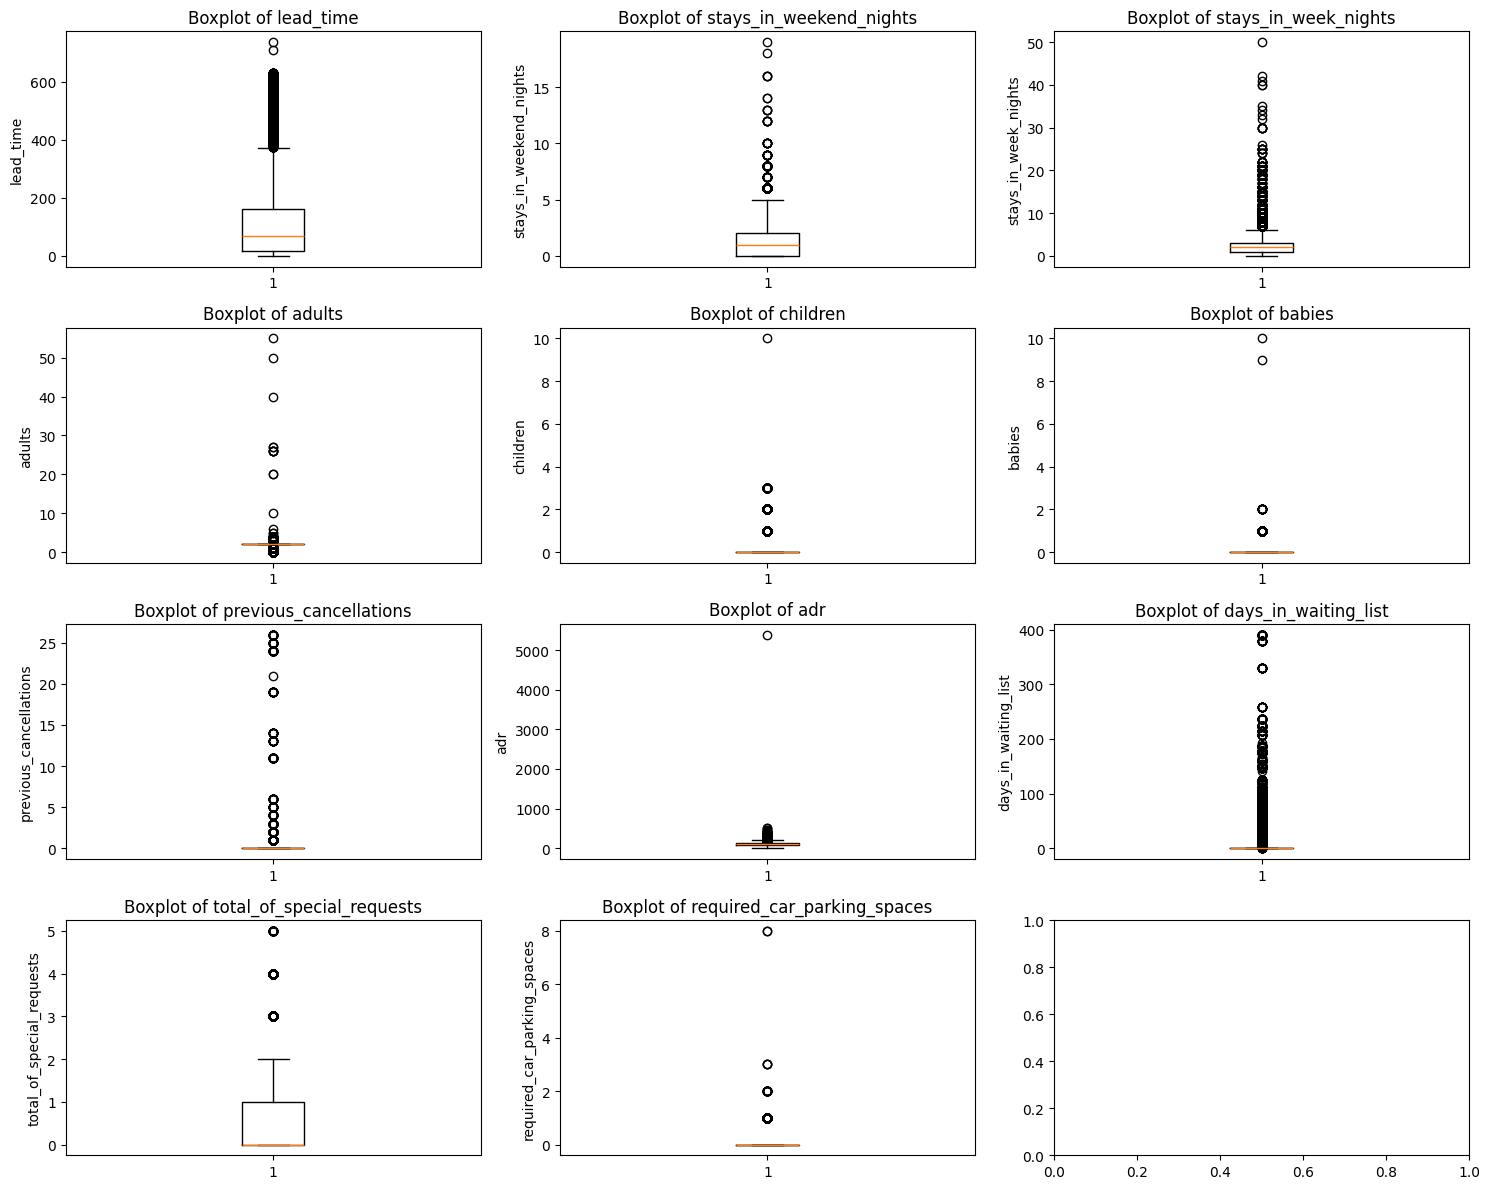

In [22]:
# DETECCIÓN DE VALORES ANÓMALOS

import matplotlib.pyplot as plt

# Crear boxplots para las variables cuantitativas donde es probable detectar outliers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Lista de variables a analizar
variables_a_analizar = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 
    'previous_cancellations', 'adr', 'days_in_waiting_list', 
    'total_of_special_requests', 'required_car_parking_spaces'
]

# Generar un boxplot por cada variable
for i, var in enumerate(variables_a_analizar):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(hotel_df[var].dropna())
    axes[row, col].set_title(f'Boxplot of {var}')
    axes[row, col].set_ylabel(var)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

'''
Conclusiones del análisis de los valores anómalos (outliers):

# Lead Time (Anticipación de reserva):
Los valores extremos en lead_time (hasta 737 días) podrían estar sesgando el análisis. 
Aunque algunas reservas con mucha anticipación pueden ser reales, estos valores influyen mucho en la media y distribución.


# Stays in Weekend Nights y Stays in Week Nights:
Las estancias extremadamente largas (como 50 noches entre semana) son outliers claros 
que podrían distorsionar el análisis general de la duración de la estadía.


# Adults, Children y Babies:
Reservas con más de 20 adultos o 10 niños/bebés parecen valores atípicos y pueden ser errores de entrada. 
Estos valores extremos deberían ser eliminados para obtener conclusiones más representativas.


# ADR (Tarifa diaria promedio):
Hay varias tarifas diarias inusualmente altas (hasta 5400) y un valor negativo, lo cual es raro. 
Los valores extremadamente altos podrían estar sesgando el análisis de ingresos por reserva, 
por lo que es recomendable eliminarlos.


# Days in Waiting List (Días en lista de espera):
Aunque las listas de espera largas son posibles, valores como 391 días parecen ser outliers. 
Eliminar estos valores permitirá un análisis más preciso del comportamiento de las listas de espera.
'''


In [25]:
# Función para eliminar outliers usando el método IQR (Rango Inter Cuartil)
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_sin_outliers = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]
    return df_sin_outliers

# Aplicar la eliminación de outliers en las columnas seleccionadas
columnas_a_limpiar = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                      'adults', 'children', 'babies', 'adr', 'days_in_waiting_list']

# Eliminar outliers en cada columna
for columna in columnas_a_limpiar:
    hotel_df = eliminar_outliers(hotel_df, columna)

# Verificar los resultados después de eliminar los outliers
hotel_df.describe().round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,stays_total_nights,total_revenue,is_repeated_guest_repeated_rate
count,71114.00,71114.00,71114.00,71114.00,71114.00,71114.00,71114.00,71114.0,71114.0,71114.0,...,71114.00,71114.00,71114.0,71114.00,71114.00,71114.00,71114,71114.00,71114.00,71114.00
mean,0.38,102.49,2016.13,27.06,15.66,0.91,2.37,2.0,0.0,0.0,...,0.03,0.16,0.0,94.46,0.06,0.59,2016-07-20 02:57:41.191889152,3.28,312.48,0.03
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,2.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,2014-10-17 00:00:00,0.00,0.00,0.03
25%,0.00,23.00,2016.00,16.00,8.00,0.00,1.00,2.0,0.0,0.0,...,0.00,0.00,0.0,70.00,0.00,0.00,2016-01-25 00:00:00,2.00,156.00,0.03
50%,0.00,74.00,2016.00,27.00,16.00,1.00,2.00,2.0,0.0,0.0,...,0.00,0.00,0.0,91.12,0.00,0.00,2016-08-01 00:00:00,3.00,267.00,0.03
75%,1.00,161.00,2017.00,38.00,23.00,2.00,3.00,2.0,0.0,0.0,...,0.00,0.00,0.0,117.00,0.00,1.00,2017-02-02 00:00:00,4.00,404.27,0.04
max,1.00,368.00,2017.00,53.00,31.00,4.00,6.00,2.0,0.0,0.0,...,31.00,18.00,0.0,187.50,8.00,5.00,2017-09-07 00:00:00,10.00,1840.00,0.04
std,0.49,94.68,0.72,13.59,8.83,0.88,1.43,0.0,0.0,0.0,...,0.45,0.56,0.0,34.57,0.24,0.78,NaN,1.85,217.77,0.01


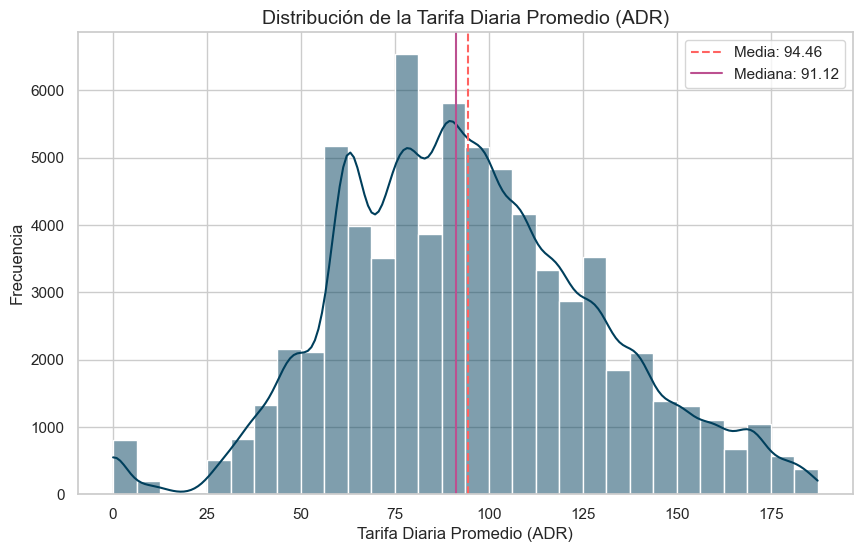

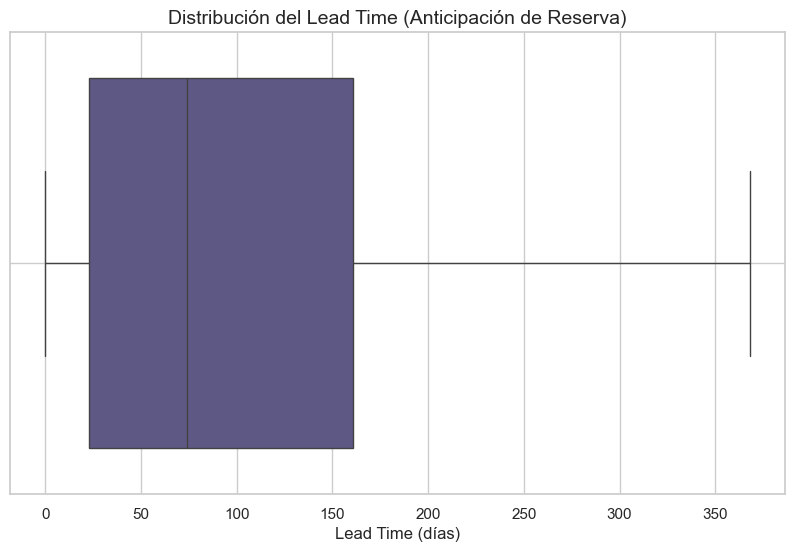

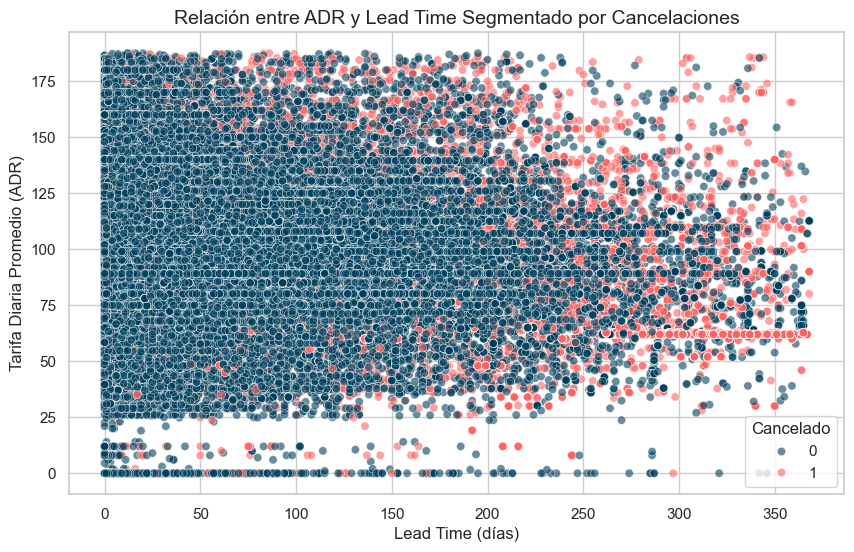

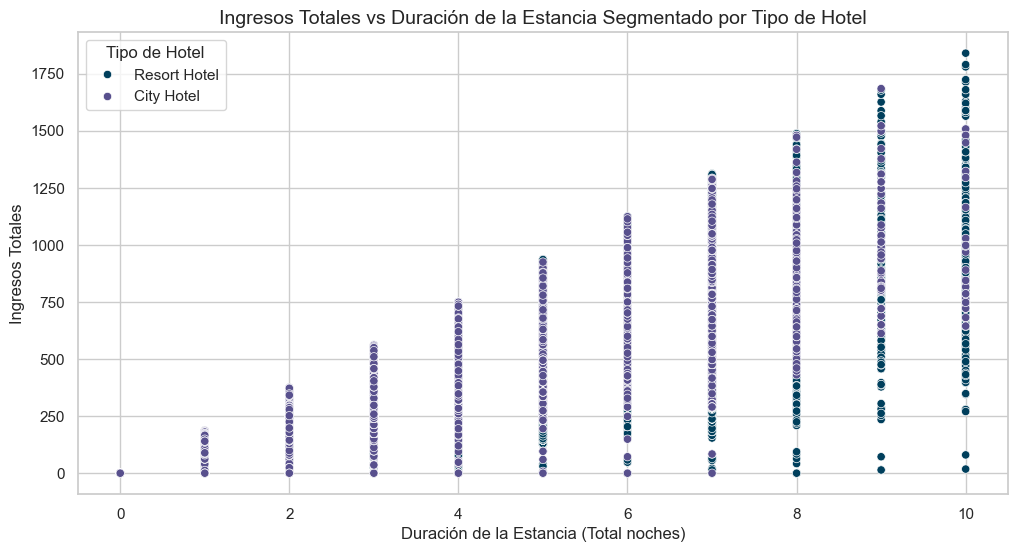

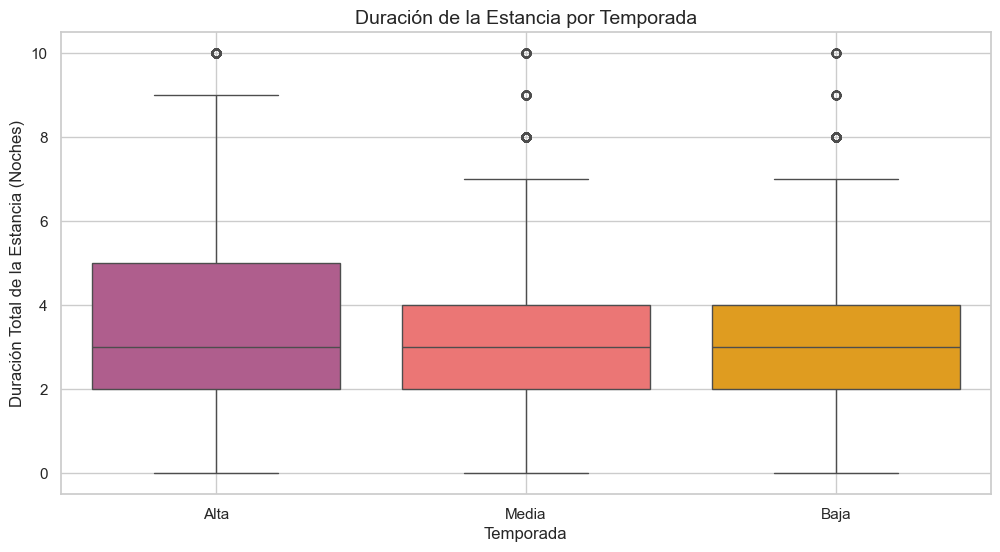

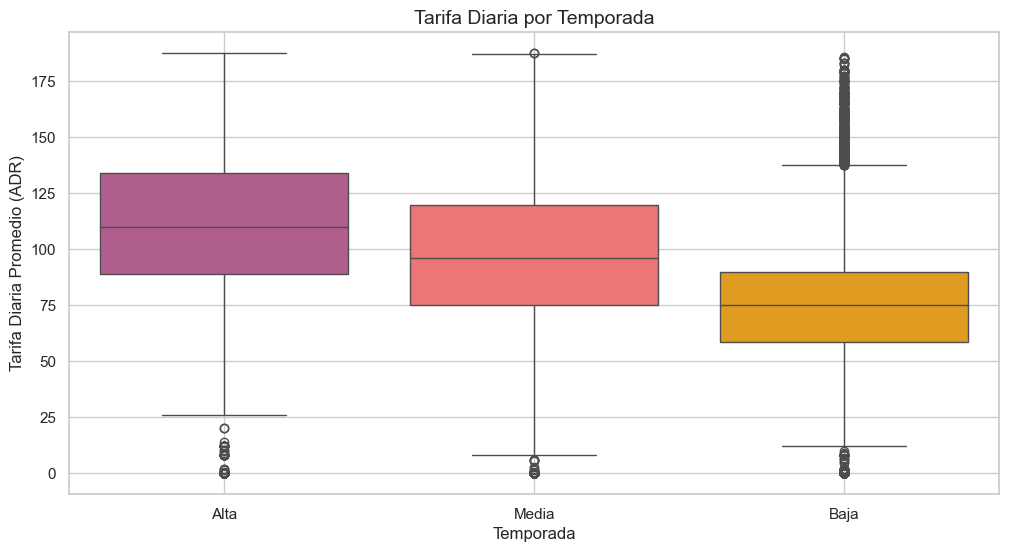

In [28]:
# EXPLORACIÓN DE DATOS

import seaborn as sns

# Paleta de colores
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
sns.set(style="whitegrid", palette=colors)

# Visualizaciones univariadas

# 1. Histograma de la Tarifa Diaria Promedio (ADR) con líneas de media y mediana
plt.figure(figsize=(10, 6))
sns.histplot(hotel_df['adr'], bins=30, kde=True, color=colors[0])
plt.axvline(hotel_df['adr'].mean(), color=colors[3], linestyle='--', label=f"Media: {hotel_df['adr'].mean():.2f}")
plt.axvline(hotel_df['adr'].median(), color=colors[2], linestyle='-', label=f"Mediana: {hotel_df['adr'].median():.2f}")
plt.title('Distribución de la Tarifa Diaria Promedio (ADR)', fontsize=14)
plt.xlabel('Tarifa Diaria Promedio (ADR)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Interpretación: El histograma de `adr` muestra que la mayoría de las tarifas diarias promedio están concentradas entre 50 y 200 unidades.
# La línea de media y la línea de mediana están relativamente cercanas, lo que indica que la distribución no está fuertemente sesgada.
# Sin embargo, se observa una cola derecha, lo que sugiere la presencia de tarifas diarias extremadamente altas, posiblemente asociadas a servicios premium o eventos especiales.
# Estos outliers deben ser considerados con cuidado para no distorsionar los análisis posteriores.


# 2. Boxplot de Lead Time (Anticipación de Reserva)
plt.figure(figsize=(10, 6))
sns.boxplot(x=hotel_df['lead_time'], color=colors[1])
plt.title('Distribución del Lead Time (Anticipación de Reserva)', fontsize=14)
plt.xlabel('Lead Time (días)')
plt.grid(True)
plt.show()

# Interpretación: El boxplot de `lead_time` revela que la mayoría de las reservas se realizan con menos de 200 días de anticipación.
# Hay varios outliers con tiempos de reserva de más de 300 días, lo que podría deberse a clientes que planean viajes con mucha antelación.
# El rango intercuartílico indica que la mitad de las reservas se realizan entre aproximadamente 20 y 160 días antes de la fecha de llegada.
# Este análisis es útil para diseñar estrategias de precios según el tiempo de anticipación de reserva

# Visualizaciones multivariadas

# 3. Scatterplot de ADR vs Lead Time segmentado por cancelaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hotel_df['lead_time'], y=hotel_df['adr'], hue=hotel_df['is_canceled'], palette={0: colors[0], 1: colors[3]}, alpha=0.6)
plt.title('Relación entre ADR y Lead Time Segmentado por Cancelaciones', fontsize=14)
plt.xlabel('Lead Time (días)')
plt.ylabel('Tarifa Diaria Promedio (ADR)')
plt.legend(title="Cancelado")
plt.grid(True)
plt.show()

# Interpretación: El scatterplot muestra una gran variabilidad en las tarifas diarias (`adr`) en función del `lead_time`.
# Las cancelaciones (puntos rojos) parecen ocurrir más en reservas con anticipaciones moderadas (entre 50 y 200 días).
# No hay una relación directa entre las tarifas extremadamente altas y las cancelaciones, lo que sugiere que otros factores podrían influir más en la decisión de cancelar.
# Este análisis puede ayudar a ajustar políticas de cancelación y estrategias de retención para reservas con tiempos de anticipación intermedios.


# 4. Ingresos Totales vs Duración de la Estancia Segmentado por Tipo de Hotel
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

plt.figure(figsize=(12, 6))
sns.scatterplot(x=hotel_df['stays_total_nights'], y=hotel_df['total_revenue'], hue=hotel_df['hotel'], palette=colors[:2])
plt.title('Ingresos Totales vs Duración de la Estancia Segmentado por Tipo de Hotel', fontsize=14)
plt.xlabel('Duración de la Estancia (Total noches)')
plt.ylabel('Ingresos Totales')
plt.grid(True)
plt.legend(title="Tipo de Hotel")
plt.show()

# Interpretación: El scatterplot muestra una correlación clara entre la duración de la estancia y los ingresos totales generados.
# Los Resort Hotels tienden a generar más ingresos por estancias largas en comparación con los City Hotels, que parecen atraer estancias más cortas.
# Esto indica que los Resort Hotels podrían beneficiarse de estrategias promocionales enfocadas en estancias prolongadas, especialmente durante la temporada alta.

# 5. Boxplot de Duración de la Estancia por Temporada
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='stays_total_nights', hue='season', data=hotel_df, palette=colors[2:5])
plt.title('Duración de la Estancia por Temporada', fontsize=14)
plt.xlabel('Temporada')
plt.ylabel('Duración Total de la Estancia (Noches)')
plt.legend([],[], frameon=False)  # Eliminar leyenda redundante
plt.grid(True)
plt.show()

# Interpretación: La temporada alta tiene una duración de estancia más larga en comparación con la temporada media y baja.
# En temporada baja, las estancias son más cortas y consistentes, con menos variabilidad, lo que podría reflejar una demanda más homogénea.
# La temporada alta tiene más outliers en estancias prolongadas, sugiriendo que algunos huéspedes aprovechan las vacaciones para estadías más largas.
# Este análisis puede ayudar a diseñar estrategias de precios y promociones específicas según la temporada.


# 6. Boxplot de ADR por Temporada
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='adr', hue='season', data=hotel_df, palette=colors[2:5])
plt.title('Tarifa Diaria por Temporada', fontsize=14)
plt.xlabel('Temporada')
plt.ylabel('Tarifa Diaria Promedio (ADR)')
plt.legend([],[], frameon=False)  # Eliminar leyenda redundante
plt.grid(True)
plt.show()

# Interpretación: Las tarifas diarias son más altas en la temporada alta, lo que coincide con una mayor demanda.
# La temporada baja muestra tarifas más bajas y menos variabilidad, lo que sugiere precios más estables y accesibles.
# Los outliers en la temporada alta pueden representar habitaciones premium o eventos especiales que aumentan las tarifas significativamente.
# Este análisis confirma la necesidad de ajustar las tarifas según la temporada para maximizar tanto la ocupación como los ingresos.



In [30]:
# ANÁLISIS ADICIONAL

# Estadísticas descriptivas de las variables clave
hotel_stats = hotel_df[['adr', 'lead_time', 'stays_total_nights', 'total_revenue', 'adults', 'children', 'babies']].describe()

# Mostrar las estadísticas
print(hotel_stats)


                adr     lead_time  stays_total_nights  total_revenue   adults  \
count  71114.000000  71114.000000        71114.000000   71114.000000  71114.0   
mean      94.460681    102.489932            3.284937     312.477455      2.0   
std       34.565038     94.684446            1.849670     217.772991      0.0   
min        0.000000      0.000000            0.000000       0.000000      2.0   
25%       70.000000     23.000000            2.000000     156.000000      2.0   
50%       91.125000     74.000000            3.000000     267.000000      2.0   
75%      117.000000    161.000000            4.000000     404.272500      2.0   
max      187.500000    368.000000           10.000000    1840.000000      2.0   

       children   babies  
count   71114.0  71114.0  
mean        0.0      0.0  
std         0.0      0.0  
min         0.0      0.0  
25%         0.0      0.0  
50%         0.0      0.0  
75%         0.0      0.0  
max         0.0      0.0  


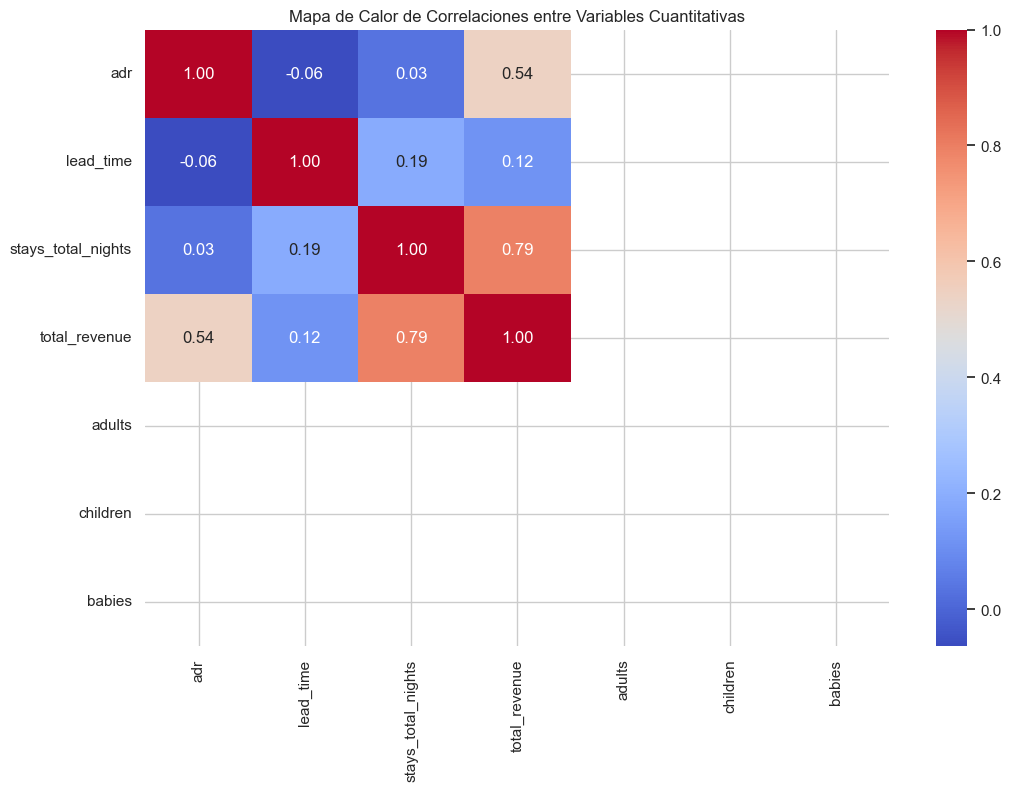

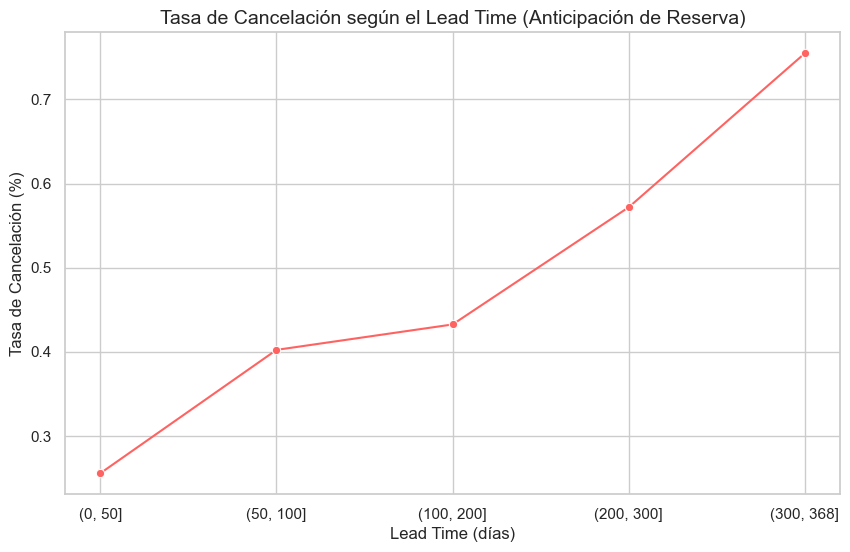

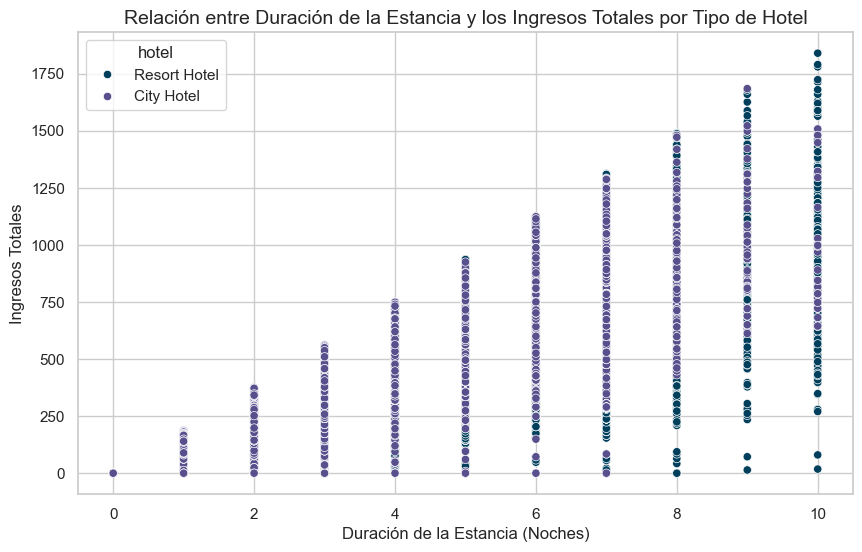

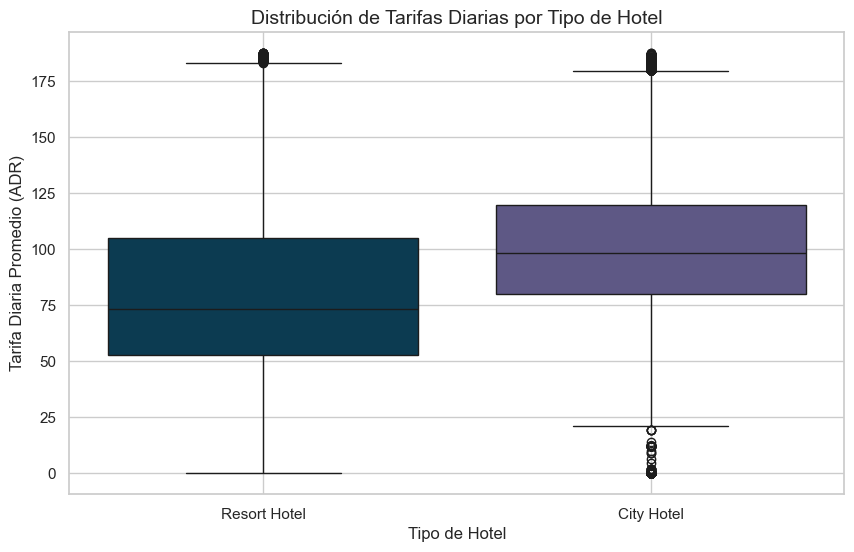

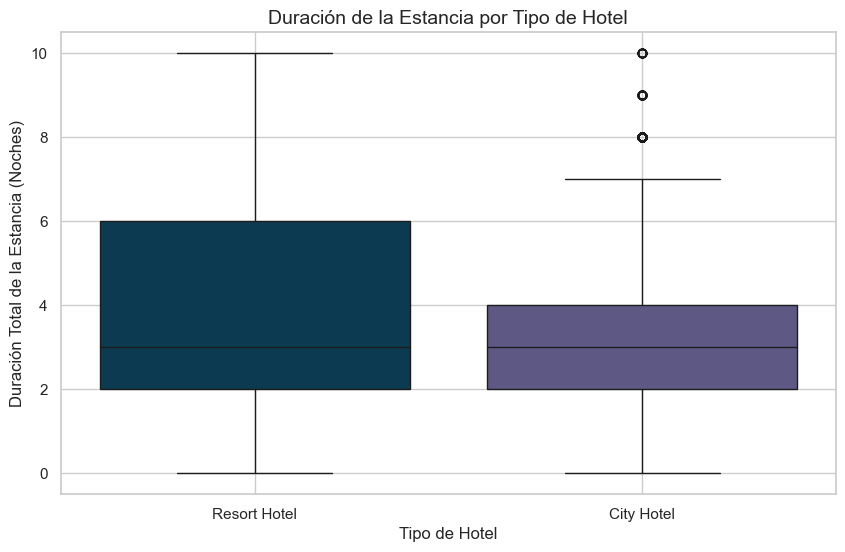

In [34]:
# Paleta de colores
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# 1. Mapa de correlaciones para las variables cuantitativas
plt.figure(figsize=(12, 8))
correlation_matrix = hotel_df[['adr', 'lead_time', 'stays_total_nights', 'total_revenue', 'adults', 'children', 'babies']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones entre Variables Cuantitativas')
plt.show()

'''
El objetivo es determinar si las tarifas diarias promedio tienen alguna correlación significativa con variables como:
- Duración de la estancia (stays_total_nights).
- Anticipación de reserva (lead_time).
- Número de personas (suma de adults, children, babies).
- Ingresos totales por reserva (total_revenue).

Hipótesis: Si adr está fuertemente correlacionada con alguna de estas variables, 
se puede optimizar las tarifas o identificar segmentos de clientes que generen más ingresos.

# Interpretación:

La correlación más fuerte es entre la duración de la estancia (stays_total_nights) y los ingresos totales (total_revenue) con un valor cercano a 1. 
Esto tiene sentido, ya que cuanto más tiempo se quede un cliente, mayores serán los ingresos generados.
La tarifa diaria promedio (adr) no muestra correlaciones fuertes con ninguna otra variable cuantitativa, 
lo que sugiere que los precios no están fuertemente influenciados por la duración de la estancia o el tamaño del grupo. Esto podría indicar una oportunidad para ajustar las tarifas en función de otros factores.
La anticipación de la reserva (lead_time) tampoco está correlacionada con otras variables clave, 
lo que implica que el tiempo de anticipación no tiene un impacto directo en las tarifas ni en la duración de la estancia.

'''

# 2. Relación entre Anticipación de Reserva (lead_time) y Tasa de Cancelación (is_canceled) con "observed=True"
lead_time_cancelation_rate = hotel_df.groupby('lead_time_bins', observed=True)['is_canceled'].mean()

# Graficar la tasa de cancelación por lead_time
plt.figure(figsize=(10, 6))
sns.lineplot(x=lead_time_cancelation_rate.index.astype(str), y=lead_time_cancelation_rate.values, marker='o', color=colors[3])
plt.title('Tasa de Cancelación según el Lead Time (Anticipación de Reserva)', fontsize=14)
plt.xlabel('Lead Time (días)')
plt.ylabel('Tasa de Cancelación (%)')
plt.grid(True)
plt.show()

'''
Correlación entre la anticipación de reserva (lead_time) y la tasa de cancelación (is_canceled)
Evalua cómo la anticipación de la reserva influye en la probabilidad de cancelación.

Hipótesis: Las reservas hechas con más anticipación podrían tener una mayor probabilidad de cancelarse, 
especialmente si los clientes cambian de opinión o encuentran ofertas más atractivas.

# Interpretación:

Las cancelaciones tienden a aumentar para reservas hechas con un lead time intermedio (entre 50 y 200 días). 
Este comportamiento sugiere que los clientes que reservan con antelación moderada pueden ser más propensos a cancelar si encuentran mejores ofertas o cambian de plan.
Las reservas hechas con menos de 50 días de antelación o más de 300 días muestran una tasa de cancelación más baja, 
lo que indica que las reservas de última hora o las reservadas muy anticipadamente suelen mantenerse.

'''

# 3. Relación entre Duración de la Estancia y los Ingresos Totales por Tipo de Hotel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stays_total_nights', y='total_revenue', hue='hotel', data=hotel_df, palette=colors[:2])
plt.title('Relación entre Duración de la Estancia y los Ingresos Totales por Tipo de Hotel', fontsize=14)
plt.xlabel('Duración de la Estancia (Noches)')
plt.ylabel('Ingresos Totales')
plt.grid(True)
plt.show()

''' 
Relación entre la duración de la estancia y los ingresos totales
Comprobar si las estancias más largas tienen un impacto directo en los ingresos.

Hipótesis: Estancias más largas deberían generar mayores ingresos, 
pero es necesario evaluar si esta relación es lineal o si hay un punto en el que se estabiliza.

# Interpretación:

Hay una fuerte correlación positiva entre la duración de la estancia y los ingresos totales. 
Esto sugiere que las estancias más largas generan ingresos mayores, especialmente en los Resort Hotels.
Sin embargo, las estancias extremadamente largas no parecen generar incrementos exponenciales en los ingresos, 
lo que indica que podría haber un punto en el que los ingresos se estabilizan.

'''

# 4. Cruces de datos: Tarifas Diarias (adr) por Tipo de Hotel
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', hue='hotel', data=hotel_df, palette=colors[:2])
plt.title('Distribución de Tarifas Diarias por Tipo de Hotel', fontsize=14)
plt.xlabel('Tipo de Hotel')
plt.ylabel('Tarifa Diaria Promedio (ADR)')
plt.grid(True)
plt.show()

# 5. Cruces de datos: Duración de la Estancia por Tipo de Hotel
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='stays_total_nights', hue='hotel', data=hotel_df, palette=colors[:2])
plt.title('Duración de la Estancia por Tipo de Hotel', fontsize=14)
plt.xlabel('Tipo de Hotel')
plt.ylabel('Duración Total de la Estancia (Noches)')
plt.grid(True)
plt.show()

'''
Tipo de hotel vs tarifas y estancias
Evaluar cómo varían las tarifas y las estancias según el tipo de hotel.

Hipótesis: Los Resort Hotels deberían tener tarifas más altas y estancias más largas, 
mientras que los City Hotels deberían atraer a clientes con estancias más cortas y tarifas más bajas.

# Interpretación del boxplot de adr:

Los Resort Hotels tienen tarifas diarias promedio más altas y más variables en comparación con los City Hotels. 
Esto sugiere que los Resort Hotels pueden ofrecer servicios premium o aprovechar la ubicación 
para justificar precios más altos.

# Interpretación del boxplot de duración de la estancia:

Los Resort Hotels tienen una duración de estancia significativamente más larga que los City Hotels. 
Esto confirma que los clientes de Resort Hotels buscan estancias más largas, probablemente por vacaciones o escapadas de ocio, 
mientras que los City Hotels suelen atraer a viajeros de negocios o turistas que solo necesitan estancias cortas.

'''